# A Single Neuron 
### Deep Learning course from Kaggle 
build a linear model and get some practice working with models in Keras. 
the tutorial: https://www.kaggle.com/code/ryanholbrook/a-single-neuron/tutorial

In [2]:
import pandas as pd

red_wine = pd.read_csv('red-wine.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
red_wine.shape # (rows, columns)

(1599, 12)

## 1. Input shape
How well can we predict a wine's perceived quality from the physiochemical measurements?
The target is 'quality', and the remaining columns are the features. Let's set the `input_shape` parameter for a Keras model on the task.

In [4]:
input_shape = [11]

## 2. Define a linear model
Define a linear model appropriate for this task: how many inputs and outputs the model should have.

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=1, input_shape=[11])
])

## 3. Look at the weights
Internally, Keras represents the weights of a neural network with tensors. **Tensors are basically TensorFlow's version of a Numpy array with a few differences that make them better suited to deep learning.** One of the most important is that tensors are compatible with GPU and TPU accelerators. TPUs, in fact, are designed specifically for tensor computations. 

In [6]:
w, b = model.weights

# display the weights
print("Weights\n{}\n\nBias\n{}".format(w,b))

Weights
<tf.Variable 'dense/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[ 0.5045646 ],
       [ 0.17579722],
       [-0.48933065],
       [-0.06850934],
       [ 0.08204168],
       [-0.01559436],
       [ 0.20527422],
       [-0.02341223],
       [-0.6641706 ],
       [ 0.09923309],
       [ 0.25220913]], dtype=float32)>

Bias
<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


### How does the weights determined? (asked to ChatGPT)
The weights of a neural network are parameters that are **learned during the training process**. The process of determining the weights involves optimization algorithms, usually based on the principles of gradient descent. The learning precess involves adjusting the weights to minimize the difference between the predicted output and the true target values. This is achieved by iteratively updating the weights using the gradients of the loss with respect to the weights. 

## 4. Plot the output of an untrained linear model
**Before training, a model's weights are set randomly.**
Run the cell below a few times to see the different lines produced with a random initialization. 

4/4 [==============================] - 0s 3ms/step


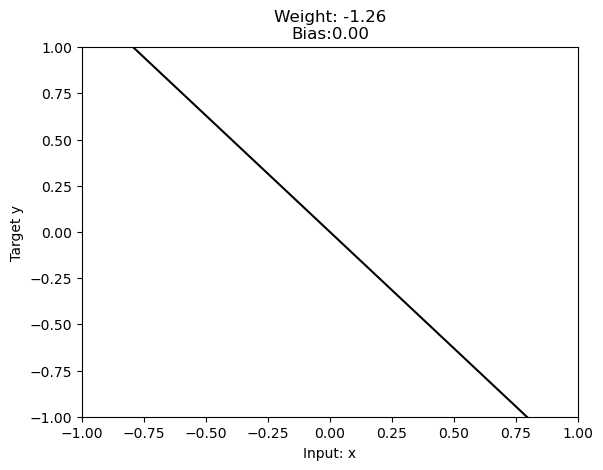

In [7]:
import tensorflow as tf 
import matplotlib.pyplot as plt 

model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x,y,'k')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights
plt.title("Weight: {:0.2f}\nBias:{:0.2f}".format(w[0][0], b[0]))
plt.show()